# Homework 1

In this assignment, we will be exploring the car dataset and analyzing their fuel efficiency. <br >
Specifically, we will do some exploratory analysis with visualizations, then we will build a model for Simple Linear Regression, a model for Polynomial Regression, and one model for Logistic Regression. <br >
**The given dataset is already modified and cleaned**, but you can find [the original information here.](https://archive.ics.uci.edu/ml/datasets/auto+mpg).

## Dataset Attribute Information

1. **mpg**: Miles per gallon. This is one primary measurement for car fuel efficiency.
2. **displacement** : The cylinder volumes in cubic inches.
3. **horsepower** : Engine power.
4. **weight** : In pounds.
5. **acceleration** : The elapsed time in seconds to go from 0 to 60mph.
6. **origin** : Region of origin.

### Libraries that can be used: numpy, pandas, scikit-learn, seaborn, plotly, matplotlib
Any libraries used in the discussion materials are also allowed.

#### Other Notes
 - Don't worry about not being able to achieve high accuracy, it is neither the goal nor the grading standard of **this** assignment. <br >
 - If not specified, you are not required to do hyperparameter tuning, but feel free to do so if you'd like.
 - Discussion materials should be helpful for doing the assignments.

In [2]:
#Loading
import seaborn
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import sklearn
import pandas

# Exercises
## Exercise 1 - Exploratory Analysis (20 points in total)

### Exercise 1.1 - Correlation Matrix (10 points)
Generate a Pearson [correlation matrix plot](https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07) in the form of a heatmap. See the link to have an idea about what this visualization should look like. <br >
After generating the plot, answer the following question: <br >
**If we are going to predict ``mpg`` in Simple Linear Regression(i.e., $y=ax+b$), which attribute are you most UNLIKELY to pick as the independent variable? Explain why.**

Requirements & notes
 - When computing correlation, make sure to drop the column ``origin`` to avoid errors.
 - The computed correlation values should be shown on the plot.
 - Use a diverging color scale with the color range being \[-1, 1\] and center being 0 (if applicable).

<AxesSubplot: >

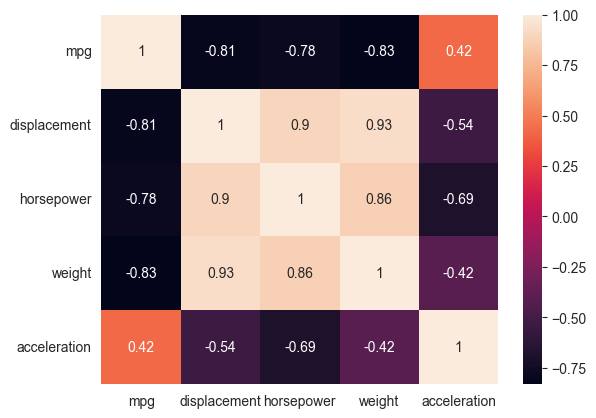

In [3]:
auto_mpg=pandas.read_csv("auto-mpg.csv")
auto_mpg=auto_mpg.drop(columns=["origin"])
seaborn.heatmap(auto_mpg.corr(),annot=True)

## **If we are going to predict mpg in Simple Linear Regression(i.e., $y=ax+b$), which attribute are you most UNLIKELY to pick as the independent variable? Explain why.**

*I am unlikelye to pick acceleration. Of the attributes above, acceleration has the least absolute correlation with any of the other attributes.*

### Exercise 1.2 - Pairplot (10 points)
Generate a pairplot(a.k.a. scatter plot matrix) of the given dataset. <br >
After generating the plot, answer the following question: <br >
**If we are using ``horsepower`` to predict ``mpg``, which method could lead to the best performance? (Linear Regression, Polynomial Regression, or Logistic Regression) Explain why.**

Note that there is no requirement on the diagonals. You can leave empty or use other representations based on your preference. However, having ``origin``-based grouped data distributions on the diagonals effectively helps you answer some questions in the later exercises.   

Requirements
 - The points should be colored based on the column ``origin``.

## Answer
*The best method for the least amount of error, or variance, would be using to use linear regression. Most likely, becuase of the negative correlation between the two attributes, and the curve of the scatter plot, it will be a inverse linear function, y=b+m/x*

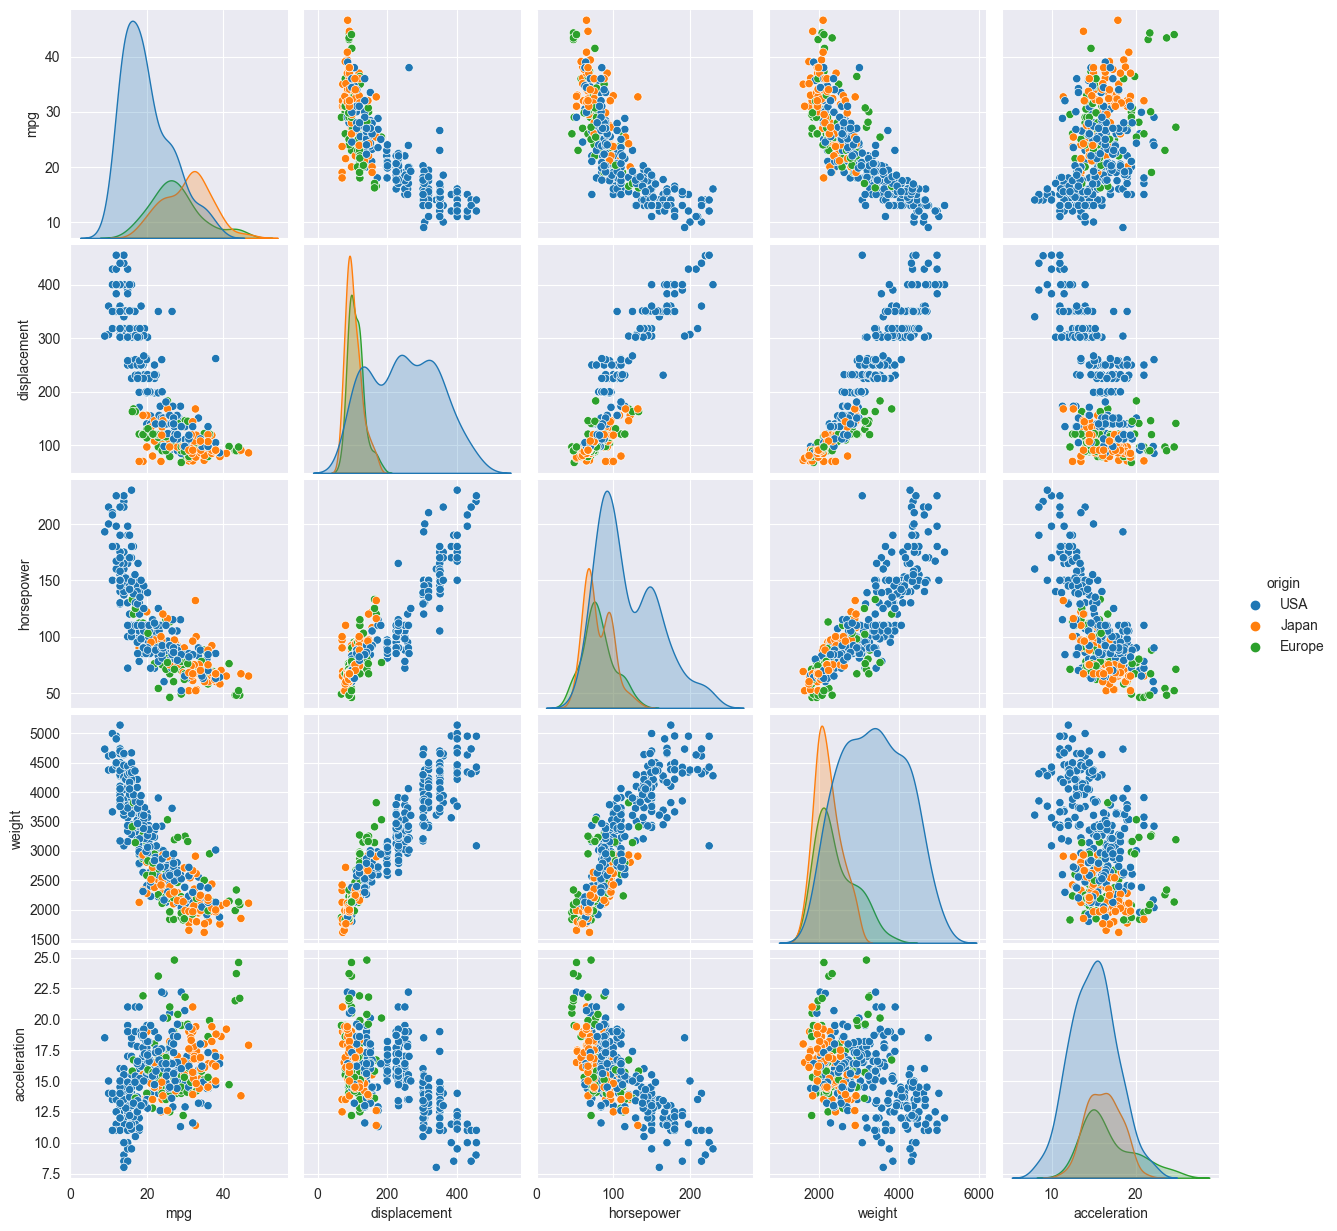

In [4]:
auto_mpg=pandas.read_csv("auto-mpg.csv")
seaborn.pairplot(auto_mpg,hue="origin")

## Exercise 2 - Linear and Polynomial Regression (40 points in total)

### Exercise 2.1 - Splitting Dataset (5 points)
Split the data into training and testing set with the ratio of 80:20.

In [5]:
import pandas
auto_mpg=pandas.read_csv("auto-mpg.csv")
##auto_mpg is a 392 population size, that does not divide into a ratio of 2:8 evenely.
##392*0.8=313.6
##392*0.2=78.4
## 314+78=392.
x_train=auto_mpg[:-78]
x_test=auto_mpg[-78:]
print(x_train)

      mpg  displacement  horsepower  weight  acceleration origin
0    18.0         307.0       130.0  3504.0          12.0    USA
1    15.0         350.0       165.0  3693.0          11.5    USA
2    18.0         318.0       150.0  3436.0          11.0    USA
3    16.0         304.0       150.0  3433.0          12.0    USA
4    17.0         302.0       140.0  3449.0          10.5    USA
..    ...           ...         ...     ...           ...    ...
309  32.1          98.0        70.0  2120.0          15.5    USA
310  37.2          86.0        65.0  2019.0          16.4  Japan
311  28.0         151.0        90.0  2678.0          16.5    USA
312  26.4         140.0        88.0  2870.0          18.1    USA
313  24.3         151.0        90.0  3003.0          20.1    USA

[314 rows x 6 columns]


### Exercise 2.2 - Simple Linear Regression (10 points)
Using one of the other attributes(excluding ``origin``) by your choice, please build a simple linear regression model that predicts ``mpg``. <br >

Requirements
 - Report the testing MSE error.

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
model_disp_v_mpg=LinearRegression()

x_train_disp=x_train["displacement"]
x_train_mpg=x_train["mpg"]
x_test_disp=x_test["displacement"]
x_test_mpg=x_test["mpg"]
x_train_disp=x_train_disp[:,np.newaxis]
x_train_mpg=x_train_mpg[:,np.newaxis]
x_test_disp=x_test_disp[:,np.newaxis]
x_test_mpg=x_test_mpg[:,np.newaxis]
model_disp_v_mpg.fit(X=x_train_disp,y=x_train_mpg)
yhat_train_prediction_mpg=model_disp_v_mpg.predict(x_train_disp)
yhat_test_prediction_mpg=model_disp_v_mpg.predict(x_test_disp)

rmse = np.sqrt(mean_squared_error(x_train_mpg,yhat_train_prediction_mpg))
rmse2 = np.sqrt(mean_squared_error(x_test_mpg,yhat_test_prediction_mpg))
r2 = r2_score(x_train_mpg,yhat_train_prediction_mpg)
r22 = r2_score(x_test_mpg,yhat_test_prediction_mpg)
print("Modeling displacement vs mpg for a car")
print('Training RMSE: %8.15f' % rmse)
print('Training R2: %8.15f' % r2)

print('Testing RMSE: %8.15f' % rmse2)
print('Testing R2: %8.15f' % r22)


Modeling displacement vs mpg for a car
Training RMSE: 3.689923660905616
Training R2: 0.694892073522427
Testing RMSE: 8.041774105724750
Testing R2: -0.799819445782086


C:\Users\gerri\AppData\Local\Temp\ipykernel_21244\414129391.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_train_disp=x_train_disp[:,np.newaxis]
C:\Users\gerri\AppData\Local\Temp\ipykernel_21244\414129391.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_train_mpg=x_train_mpg[:,np.newaxis]
C:\Users\gerri\AppData\Local\Temp\ipykernel_21244\414129391.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_test_disp=x_test_disp[:,np.newaxis]
C:\Users\gerri\AppData\Local\Temp\ipykernel_21244\414129391.py:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj

### Exercise 2.3 - Polynomial Regression (25 points)
Build polynomial regression models that predict ``mpg`` with the same choice in 2.2. <br >
Specifically, from degree=2 to degree=4, build one respectively. <br >
Then, based on the reported errors from only these three degrees, **do you think there is a sign of overfitting? Provide your reasoning.**


Requirements
 - Report the training MSE error for each of the three degrees.
 - Report the testing MSE error for each of the three degrees.


In [7]:
# x_train_disp=x_train["displacement"]
# x_train_mpg=x_train["mpg"]
# x_test_disp=x_test["displacement"]
# x_test_mpg=x_test["mpg"]
for deg in [2,3,4]:
    polynomial_features= PolynomialFeatures(degree=deg)
    x_poly_train_disp = polynomial_features.fit_transform(x_train_disp)
    x_poly_test_disp = polynomial_features.fit_transform(x_test_disp)
    model_disp_v_mpg.fit(x_poly_train_disp,x_train_mpg)
    yhat_train_prediction_mpg=model_disp_v_mpg.predict(x_poly_train_disp)
    yhat_test_prediction_mpg=model_disp_v_mpg.predict(x_poly_test_disp)
    rmse = np.sqrt(mean_squared_error(x_train_mpg,yhat_train_prediction_mpg))
    rmse2 = np.sqrt(mean_squared_error(x_test_mpg,yhat_test_prediction_mpg))

    r2 = r2_score(x_train_mpg,yhat_train_prediction_mpg)
    r22 = r2_score(x_test_mpg,yhat_test_prediction_mpg)
    print("Modeling displacement vs mpg for a car but polynomial for deg"+str(deg))
    print('Training RMSE: %8.15f' % rmse)
    print('Training R2: %8.15f' % r2)
    print('Testing RMSE: %8.15f' % rmse2)
    print('Testing R2: %8.15f' % r22)

Modeling displacement vs mpg for a car but polynomial for deg2
Training RMSE: 3.413970475109362
Training R2: 0.738821003096616
Testing RMSE: 7.702887309319271
Testing R2: -0.651323986257334
Modeling displacement vs mpg for a car but polynomial for deg3
Training RMSE: 3.398812164962369
Training R2: 0.741135166650814
Testing RMSE: 7.724710052168869
Testing R2: -0.660693840426219
Modeling displacement vs mpg for a car but polynomial for deg4
Training RMSE: 3.379830132649774
Training R2: 0.744018561732483
Testing RMSE: 7.811865537563778
Testing R2: -0.698379422617338


### This may be ignorable, as I completely forgot to just write the answer at time of submission. 10/19/2022
No. The RMSE does not significantly change to indicate an overfitting, and the R2 is below a signficant R^2

## Exercise 3 - Logistic Regression (40 points in total)

Now we are going to build a classification model on ``origin`` using all the other 5 attributes. <br >
Note that Logistic Regression is a binary classificaiton algorithm.

### Exercise 3.1 - Processing and Splitting the Dataset (5 points)
In this exercise 3, we only consider those observations where they originate from either "USA" or "Japan". <br >
So please **remove** those observations that originate from "Europe". <br >
And then, split the data into training and testing set with the ratio of 80:20. <br >


In [8]:
auto_mpg=pandas.read_csv("auto-mpg.csv")
auto_origin_index=auto_mpg.set_index("origin")
auto_origin_index=auto_origin_index.drop("Europe")
##auto_mpg is a 392 population size, that does not divide into a ratio of 2:8 evenely.
##324*0.8=249.2
##324*0.2=64.8
training=auto_origin_index[:-65]
testing=auto_origin_index[-65:]
#print(testing)

### Exercise 3.2 - Logistic Regression (20 points)

Using all the other 5 attributes, please build a Logistic Regression model that distinguishes between cars from Japan and cars from the USA. <br >
Then, **if we are distinguishing between Japan and Europe this time, how do you think the model performance(in terms of accuracy) will change? Provide your reasoning.**

Requirements
 - Report the testing precision and recall for both regions.

## Answer
If we distinguish between Japan and Europe, there will be a difference in error. This is because of different population sizes between USA cars and European cars, and the model would fit different because of the different correlation coefficients, standard deviation, and variance within the populations, as seen in my pair plot above. Basically, the USA and European cars are distinct to each other, and a model fit to the USA cars could not fit to the European cars, and vice versa.

In [9]:
from sklearn.linear_model import LogisticRegression
import sklearn
Log_Reg=LogisticRegression()
x_train=training
y_train=[]
for i in training.index:
    if i=="USA":
        y_train.append(1)
    else:
        y_train.append(0)

x_test=testing
y_test=[]
for i in testing.index:
    if i=="USA":
        y_test.append(1)
    else:
        y_test.append(0)

Log_Reg.fit(x_train,y_train)
train_predict=Log_Reg.predict(x_train)
test_predict=Log_Reg.predict(x_test)

rmse = np.sqrt(mean_squared_error(train_predict,y_train))
rmse2 = np.sqrt(mean_squared_error(test_predict,y_test))
r2 = r2_score(y_train,train_predict)
r22 = r2_score(y_test,test_predict)
print("Modeling displacement vs mpg for a car")
print('Training RMSE:',rmse)
print('Training R2:', r2)
print('Training Recall Score:',sklearn.metrics.recall_score(y_train,train_predict))
print('Training Percision Score:',sklearn.metrics.precision_score(y_train,train_predict),"\n")

print('Testing RMSE: %8.15f' % rmse2)
print('Testing R2: %8.15f' % r22)
print('Testing Recall Score:',sklearn.metrics.recall_score(y_test,test_predict))
print('Testing Percision Score:',sklearn.metrics.precision_score(y_test,test_predict),"\n")
#print('Testing Percision Score:',percision_score(y_test,test_predict),"\n")

Modeling displacement vs mpg for a car
Training RMSE: 0.2847473987257497
Training R2: 0.4541348855881173
Training Recall Score: 0.9481132075471698
Training Percision Score: 0.95260663507109 

Testing RMSE: 0.554700196225229
Testing R2: -0.231060606060606
Testing Recall Score: 0.7575757575757576
Testing Percision Score: 0.6756756756756757 



### Exercise 3.3 - Model coefficients (10 points)

Using all the attributes used in 3.2, plot the model coefficients in a scatter plot as shown in class. Explain the contribution of the top 3 coefficients, and interpret their meaning and their contribution to the $\hat{y}$ prediction. Example can be found [here](https://quantifyinghealth.com/interpret-logistic-regression-coefficients/)

Model Coefficients
[mpg, displacement, horsepower, weight, acceleration]
[-0.01632598  0.12468135 -0.11103035 -0.0020119   0.0028731 ]


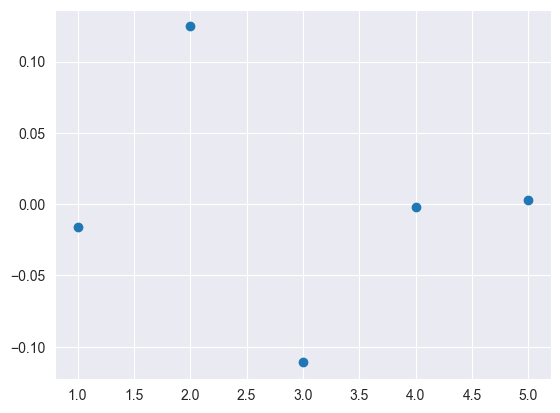

In [10]:
print("Model Coefficients")
print("[mpg, displacement, horsepower, weight, acceleration]")
print(Log_Reg.coef_[0])
num_coeff=list(range(1,len(Log_Reg.coef_[0])+1))
plt.scatter(num_coeff,Log_Reg.coef_)

## Answer
I set being USA as 1 and Japan as 0, (Cause USA number 1 ;)) to perform logistical regression. So, the top coefficients are the largest magnitude coefficients. The more negative a coefficient, the more negative the coefficient, the more that attribute, as a large number, contributes to being Japanese.  Positive coefficient means the attribute pushes toward being USA. So, the biggest coeffs are displacement, horsepower, and acceleration. Meaning that americans like cars that go vroom, dont care about how heavy it is or fuel economy.

So, your chances of having a car from the USA increases e^0.12468 compared to being from Japan for each unit of displacement.

log(p/p-1)=a+bx1+cx2+dx3+ex4+fx5
log of probability being USA over Japan.
So...
[mpg, displacement, horsepower, weight, acceleration]
[-0.01632598  0.12468135 -0.11103035 -0.0020119   0.0028731 ]
b is displacement, and coefficient 0.1246. Then an single unit increase in x1, will add 0.1246 to the log(p/p-1). It will add e^0.1246, 1.13269, to the ratio of (p/p-1).
So, the more displaced, horsepower, or mpg the car has, it is respectively 1.13, 0.8949, and 0.9838075 times likely to be a USA car as a Japanese car. So the prediction will be more influenced to predict japanese cars, since the top three coefficients are negative.

### Exercise 4 - Collaborative Statement (5 points)

It is mandatory to include a Statement of Collaboration in each submission, that follows the guidelines below.
Include the names of everyone involved in the discussions (especially in-person ones), and what was discussed.
All students are required to follow the academic honesty guidelines posted on the course website. For
programming assignments in particular, I encourage students to organize (perhaps using Piazza) to discuss the
task descriptions, requirements, possible bugs in the support code, and the relevant technical content before they
start working on it. However, you should not discuss the specific solutions, and as a guiding principle, you are
not allowed to take anything written or drawn away from these discussions (no photographs of the blackboard,
written notes, referring to Piazza, etc.). Especially after you have started working on the assignment, try to restrict
the discussion to Piazza as much as possible, so that there is no doubt as to the extent of your collaboration.

I did collaborate with Caroline to interprate the instructions, and where to draw examples from jupyter notebook examples from class, but the code itself I wrote. I did also ask for help from some guys who already finished the HW while standing outside of class, but they just gave me tips like reading white papers. I did not get any help for writing the actual code, nor shared it with anyone.

Compared calculation outputs with Chuan Hsin Wang